In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\sumet\Downloads\superstore.csv", delimiter=None, engine="python")
print(df.head())


          Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  记录数               Order.Date        Order.ID  ... Sales  \
0       0.0     US    1  2011-01-07 00:00:00.000  CA-2011-130813  ...    19   
1       0.0     US    1  2011-01-21 00:00:00.000  CA-2011-148614  ...    19   
2       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...    21   
3       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...   111   
4       0.0     US    1  2011-09-29 00:00:00.000  CA-2011-146969  ...     6   

    Segment                Ship.Date       S

In [3]:
print(df.isnull().sum())
print(df.dtypes)


Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64
Category           object
City               object
Country            object
Customer.ID        object
Customer.Name      object
Discount          float64
Market             object
记录数                 int64
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity            int64
Region             object
Row.ID              int64
Sales

In [4]:
df['Sales'].fillna(df['Sales'].median(), inplace=True)
df['Profit'].fillna(df['Profit'].mean(), inplace=True)
df['Region'].fillna("Unknown", inplace=True)


In [5]:
df = df.drop_duplicates()

In [6]:
import numpy as np
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]


In [7]:
print(df.describe())

           Discount      记录数        Profit      Quantity        Row.ID  \
count  45635.000000  45635.0  45635.000000  45635.000000  45635.000000   
mean       0.148033      1.0     10.191308      3.263789  25880.867624   
std        0.218058      0.0     64.842801      2.155229  14992.542863   
min        0.000000      1.0  -1924.542000      1.000000      1.000000   
25%        0.000000      1.0     -0.013200      2.000000  12689.500000   
50%        0.000000      1.0      7.703100      3.000000  26109.000000   
75%        0.200000      1.0     26.661600      4.000000  39056.500000   
max        0.850000      1.0    284.220000     14.000000  51290.000000   

              Sales  Shipping.Cost          Year       weeknum  
count  45635.000000   45635.000000  45635.000000  45635.000000  
mean     121.667580      13.255251   2012.779796     31.246653  
std      131.533837      18.916832      1.098096     14.426964  
min        0.000000       0.002000   2011.000000      1.000000  
25%     

C:\Users\sumet\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from current font.
  fig.canvas.draw()
C:\Users\sumet\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from current font.
  fig.canvas.draw()
C:\Users\sumet\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()
C:\Users\sumet\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sumet\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing 

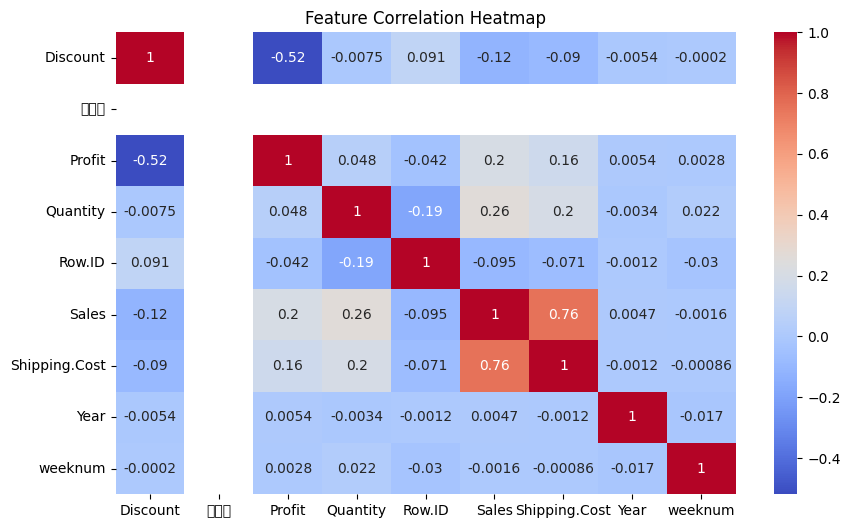

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


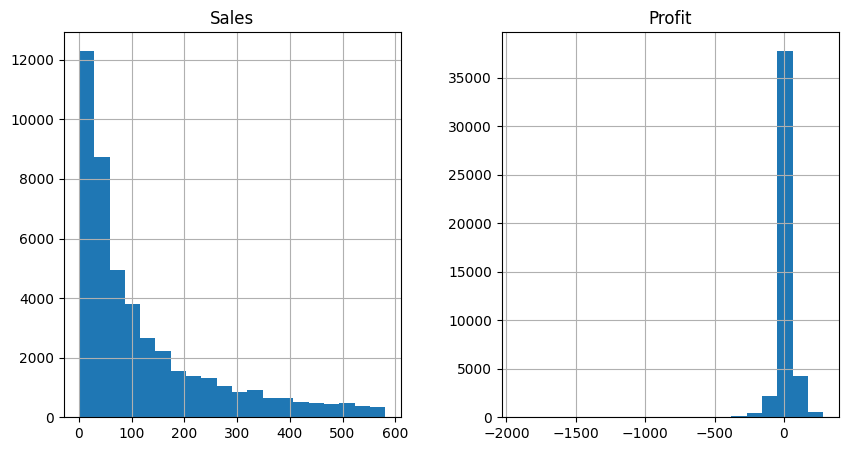

In [10]:
df[['Sales', 'Profit']].hist(figsize=(10, 5), bins=20)
plt.show()

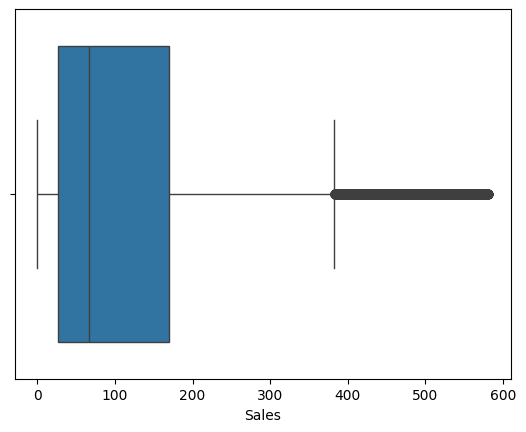

In [11]:
sns.boxplot(x=df["Sales"])
plt.show()

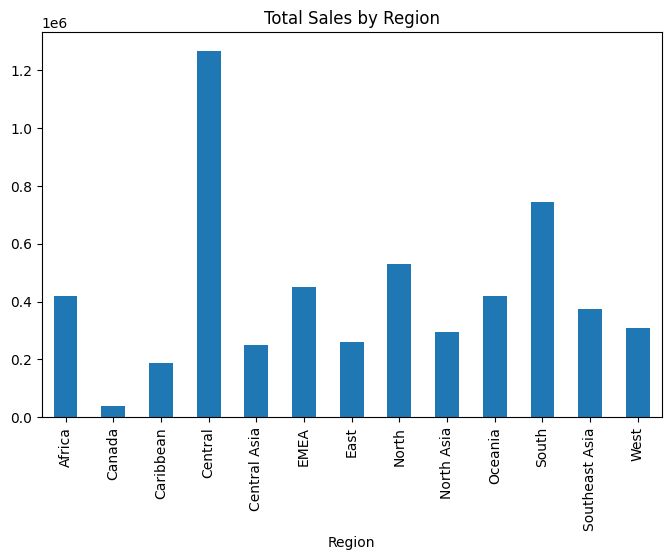

In [12]:
df.groupby("Region")["Sales"].sum().plot(kind="bar", figsize=(8,5))
plt.title("Total Sales by Region")
plt.show()

In [38]:
print("PROJECT 2")

PROJECT 2


Dataset Shape: (2823, 25)

Missing Values:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Data Types:
 ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          obj

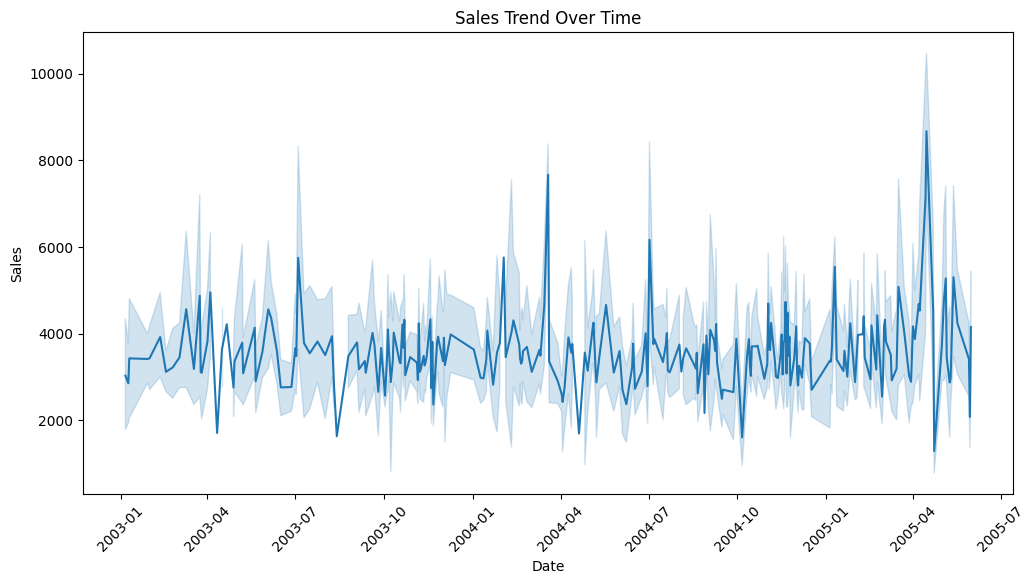

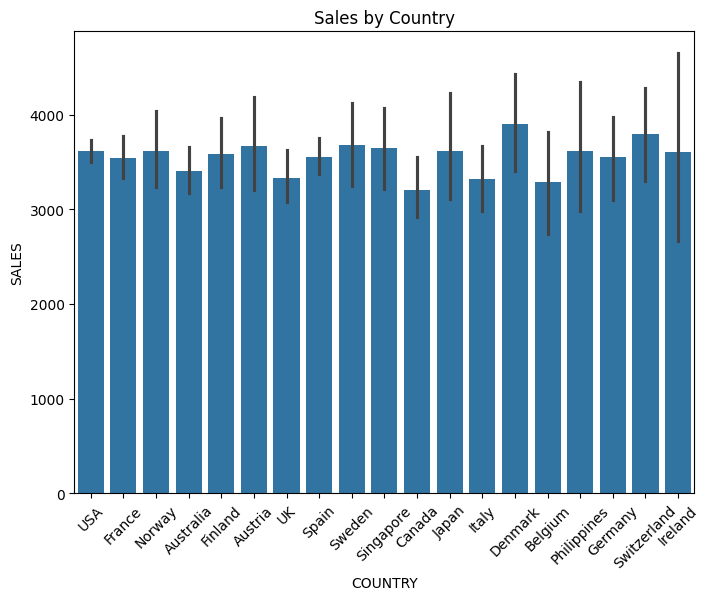

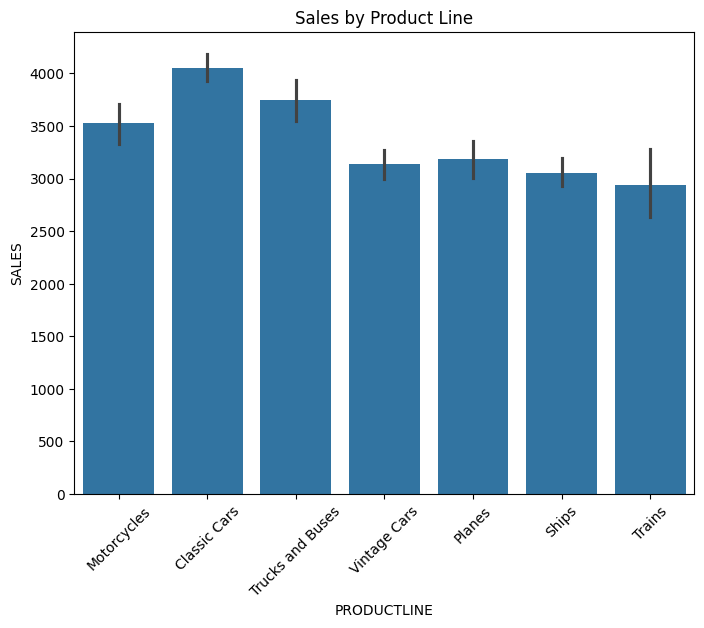

Model Coefficients: [100.75935549  59.36412107]
Model Intercept: -4975.40944457546
MAE: 773.1863241184022
MSE: 1359458.7982060874
RMSE: 1165.958317525154


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


file_path = "C:\\Users\\sumet\\Downloads\\sales_data_sample.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")


print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)


df.columns = df.columns.str.strip()


df.drop_duplicates(inplace=True)
df.fillna({'SALES': df['SALES'].mean()}, inplace=True)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


plt.figure(figsize=(12, 6))
sns.lineplot(x=df['ORDERDATE'], y=df['SALES'])
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=df['COUNTRY'], y=df['SALES'])
plt.title("Sales by Country")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=df['PRODUCTLINE'], y=df['SALES'])
plt.title("Sales by Product Line")
plt.xticks(rotation=45)
plt.show()


X = df[['QUANTITYORDERED', 'PRICEEACH']]
y = df['SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
